In [1]:
import numpy as np
import h5py

#f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
#              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
#              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
#              +",FALSE,1/deeplift.imp_score.h5", "r")
f = h5py.File("deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
#grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
#                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
#                +"/Nanog/out/profile/wn/modisco.h5","r")
grp = h5py.File("modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [4]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [5]:
#Saving the seqlets

"""extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))"""

'extracted_contrib_scores = []\nextracted_hypothetical_scores = []\nextracted_onehot_seqs = []\nseqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets\n\nwindow_around = 50\n\n#extract +/- 50bp around each seqlet\nfor seqlet in seqlets_list:\n    example_idx = seqlet.coor.example_idx\n    start = seqlet.coor.start\n    end = seqlet.coor.end\n    if ((start>=window_around) and (end<=1000-window_around)):\n        extracted_contrib_scores.append(\n            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])\n        extracted_hypothetical_scores.append(\n            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])\n        extracted_onehot_seqs.append(\n            onehot_seq[example_idx,start-window_around:end+window_around])\n\nnp.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))\nnp.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))\nnp.save("

In [6]:
!ls

523a1a82c23711ea9f9157d4c043164e.bin
523a1a82c23711ea9f9157d4c043164e_graph.bin
523a1a82c23711ea9f9157d4c043164e_graph.weights
523a1a82c23711ea9f9157d4c043164e.tree
agkm_50kseqlets_allpattern_hits.txt
agkm_50kseqlets_esrrb_hits.txt
agkm_50kseqlets_goingin.txt
agkm_50kseqlets_laststage.txt
agkmfewerseqles_newclustermerging.h5
agkmfewerseqles_noclustermerging.h5
agkmfewerseqles_withmotifsprereassignment.h5
agkm_fewerseqlets_allpattern_hits.txt
agkm_fewerseqlets_esrrb_hits.txt
agkm_fewerseqlets_goingin.txt
agkm_fewerseqlets_laststage.txt
agkm_r2_allpattern_hits.txt
agkm_r2_esrrb_hits.txt
agkm_r2_goingin.txt
agkm_r2_laststage.txt
BpNet-Viz.ipynb
commit0975f52_l6g2m0_results.hdf5
commit20e04f_corrthresh0_nomemeinit_4layerembedding_results.hdf5
commit20e04f_corrthresh0p1_nomemeinit_4layerembedding_results.hdf5
commit20e04f_nomemeinit_4layerembedding_results.hdf5
commit891181_memeinit_l6g2m0_results.hdf5
commit891181_nomemeinit_l6g2m0_results.hdf5
commit97f7d5b_agkm_default_results.hdf5
commi

In [7]:
#for i in range(10):
#    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
#    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

In [8]:
#visualize the saved patterns:
"""%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)"""

'%matplotlib inline\nfrom modisco.visualization import viz_sequence\nfor idx,pattern in enumerate(patterns):\n    print("pattern idx",idx)\n    print(len(pattern.seqlets))\n    viz_sequence.plot_weights(\n        pattern["Nanog_profile_wn_contrib_scores"].fwd)\n    viz_sequence.plot_weights(pattern["sequence"].fwd)'

/mnt/lab_data2/avanti/tfmodisco
commit 11c84dc0d219a547f30a8ef0eb0a8581baa7f2df (HEAD -> bugfix, origin/bugfix)
Author: AvantiShri <avanti.shrikumar@gmail.com>
Date:   Tue Feb 2 21:28:16 2021 -0800

    bugfix for cases where there are lots of ties at the high end (e.g. with ir transformation)
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1
MEMORY 36.50473984
On task Nanog_profile_wn
Fitting - on window size 5
peak(mu)= 0.0012310924688354135
Computing window sums
Done computing window sums
Subsampling!
For increasing = True , the minimum IR precision was 0.14455306826438058 occurring at 0.0 implying a frac_neg of 0.16897958587693607
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.454150293610314 occurring at -8.055940270423889e-08 implying a frac_neg of 0.8320061150423939
To be conservative, adjusted frac neg is 0.95


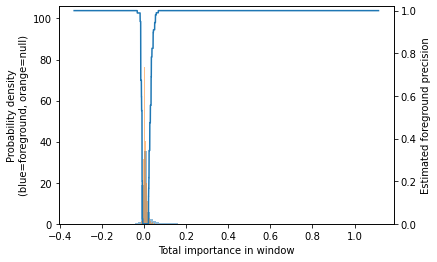

Fitting - on window size 9
peak(mu)= 0.002228102535009384
Computing window sums
Done computing window sums
Subsampling!
For increasing = True , the minimum IR precision was 0.3538943525081918 occurring at 0.0 implying a frac_neg of 0.5477344980376119
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.28429396204428686 occurring at -2.9802322387695312e-08 implying a frac_neg of 0.3972216901457502
To be conservative, adjusted frac neg is 0.95


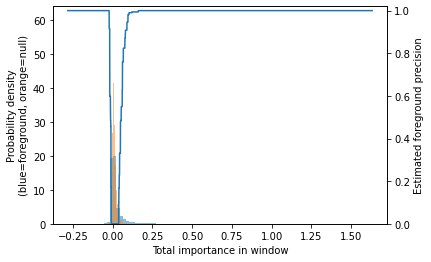

Fitting - on window size 13
peak(mu)= 0.003580867570824921
Computing window sums
Done computing window sums
Subsampling!
For increasing = True , the minimum IR precision was 0.23629259379318862 occurring at 0.0 implying a frac_neg of 0.3094019933194163
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.46684317082348525 occurring at -7.450580596923828e-09 implying a frac_neg of 0.8756207278532773
To be conservative, adjusted frac neg is 0.95


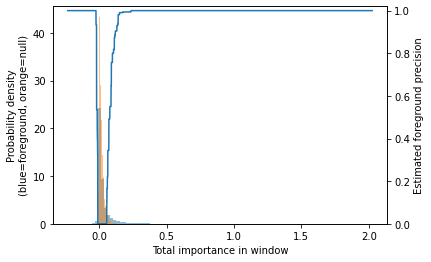

Fitting - on window size 17
peak(mu)= 0.005162722303066403
Computing window sums
Done computing window sums
Subsampling!
For increasing = True , the minimum IR precision was 0.047592944796423946 occurring at 0.0 implying a frac_neg of 0.049971222426792083
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.16799799932330053 occurring at -2.086162567138672e-07 implying a frac_neg of 0.20192018671428827
To be conservative, adjusted frac neg is 0.95


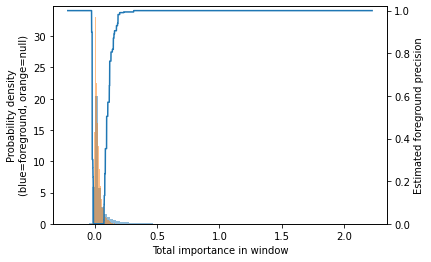

Fitting - on window size 21
peak(mu)= 0.00754788601747714
Computing window sums
Done computing window sums
Subsampling!
For increasing = True , the minimum IR precision was 0.37577224214168486 occurring at 0.0 implying a frac_neg of 0.6019793855866568
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.48571764379950555 occurring at -1.4484976418316364e-07 implying a frac_neg of 0.9444571409915278
To be conservative, adjusted frac neg is 0.95


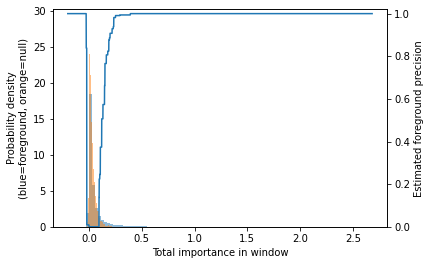

Subsampling!


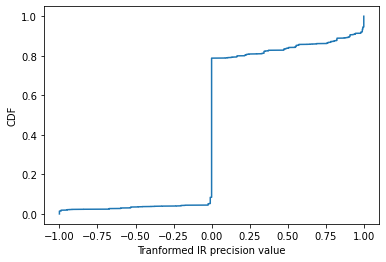

Thresholds from null dist were -0.99  and  0.99 with frac passing 0.088386
Passing windows frac was 0.088386 , which is above  0.03 ; adjusting
New thresholds are 1.0 and -1.0
Got 403956 coords
After resolving overlaps, got 403956 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9999
MEMORY 36.5355008
403956 identified in total
min_metacluster_size_frac * len(seqlets) = 8079 is more than min_metacluster_size=2000.
Using it as a new min_metacluster_size
2 activity patterns with support >= 8079 out of 2 possible patterns
Metacluster sizes:  [307428, 96528]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 36.5355008
On metacluster 1
Metacluster size 96528 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 36.5355008
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  31 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done 292 tasks      | elapsed:   11.6s
[Parallel(n_jobs=10)]: Done 792 tasks      | elapsed:   16.2s
[Parallel(n_jobs=10)]: Done 1492 tasks      | elapsed:   22.4s
[Parallel(n_jobs=10)]: Done 2392 tasks      | elapsed:   30.6s
[Parallel(n_jobs=10)]: Done 3492 tasks      | elapsed:   40.4s
[Parallel(n_jobs=10)]: Done 4792 tasks      | elapsed:   52.1s
[Parallel(n_jobs=10)]: Done 6292 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 7992 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 9892 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 11992 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 14292 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 16792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 19492 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done 22392 tasks 

Constructing csr matrix...
csr matrix made in 14.357891082763672 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 50000 out of 50000 | elapsed:  3.1min finished


Constructing csr matrix...
csr matrix made in 14.174151420593262 s
Finished embedding computation in 1305.51 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 100/100 [07:58<00:00,  4.78s/it]


Batching in slices of size 500


100%|██████████| 100/100 [07:58<00:00,  4.79s/it]


Finished affinity matrix computations in 1061.7 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 65.82110208
Computed nearest neighbors in 148.53 s
MEMORY 65.821405184
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 65.821405184
Launching nearest neighbors affmat calculation job
MEMORY 65.821810688
Parallel runs completed
MEMORY 65.853882368
Job completed in: 451.87 s
MEMORY 74.96556544
Launching nearest neighbors affmat calculation job
MEMORY 74.932383744
Parallel runs completed
MEMORY 75.00703744
Job completed in: 395.09 s
MEMORY 93.722902528
(Round 1) Computed affinity matrix on nearest neighbors in 879.71 s
MEMORY 76.259291136
Filtered down to 4168 of 50000
(Round 1) Retained 4168 rows out of 50000 after filtering
MEMORY 76.259291136
(Round 1) Computing density adapted affmat
MEMORY 36.25928704
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4168 samples in 0.029s...
[t-SNE] Computed neighbors for 4168 samples in 0.196s...
[t-SNE] Computed c

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7770212576078918


  2%|▏         | 1/50 [00:01<01:29,  1.83s/it]

Quality: 0.7785856388488062


 24%|██▍       | 12/50 [00:22<01:09,  1.83s/it]

Quality: 0.7786347837562558


100%|██████████| 50/50 [01:44<00:00,  2.09s/it]

Got 30 clusters after round 1
Counts:
{10: 133, 6: 180, 0: 859, 16: 63, 17: 56, 22: 27, 11: 104, 15: 66, 8: 169, 21: 45, 13: 85, 1: 672, 2: 276, 5: 185, 3: 251, 9: 159, 14: 72, 20: 47, 18: 55, 19: 50, 24: 24, 26: 13, 7: 172, 25: 23, 28: 8, 12: 87, 29: 4, 27: 13, 4: 244, 23: 26}
MEMORY 35.63956224
(Round 1) Aggregating seqlets in each cluster
MEMORY 35.63956224
Aggregating for cluster 0 with 859 seqlets
MEMORY 35.63956224


Trimming eliminated 0 seqlets out of 859
Removed 7 duplicate seqlets
Dropping cluster 0 with 852 seqlets due to sign disagreement
Aggregating for cluster 1 with 672 seqlets
MEMORY 35.63956224
Trimming eliminated 0 seqlets out of 672
Skipped 6 seqlets
Dropping cluster 1 with 666 seqlets due to sign disagreement
Aggregating for cluster 2 with 276 seqlets
MEMORY 35.63956224
Trimming eliminated 0 seqlets out of 276
Skipped 1 seqlets
Removed 1 duplicate seqlets
Removed 1 duplicate seqlets
Dropping cluster 2 with 273 seqlets due to sign disagreement
Aggregating for cluster 3 with 251 seqlets
MEMORY 35.63956224
Trimming eliminated 0 seqlets out of 251
Skipped 24 seqlets
Dropping cluster 3 with 227 seqlets due to sign disagreement
Aggregating for cluster 4 with 244 seqlets
MEMORY 35.63956224
Trimming eliminated 0 seqlets out of 244
Skipped 5 seqlets
Dropping cluster 4 with 239 seqlets due to sign disagreement
Aggregating for cluster 5 with 185 seqlets
MEMORY 35.63956224
Trimming eliminated 0 s

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  31 tasks      | elapsed:    8.7s
[Parallel(n_jobs=10)]: Done 282 tasks      | elapsed:   11.2s
[Parallel(n_jobs=10)]: Done 782 tasks      | elapsed:   15.6s
[Parallel(n_jobs=10)]: Done 1482 tasks      | elapsed:   21.3s
[Parallel(n_jobs=10)]: Done 2382 tasks      | elapsed:   28.7s
[Parallel(n_jobs=10)]: Done 3482 tasks      | elapsed:   37.5s
[Parallel(n_jobs=10)]: Done 4782 tasks      | elapsed:   47.6s
[Parallel(n_jobs=10)]: Done 6282 tasks      | elapsed:   59.6s
[Parallel(n_jobs=10)]: Done 7982 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 9882 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 11982 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 14282 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 16782 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 19482 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 22382 tasks 

Constructing csr matrix...
csr matrix made in 14.547314882278442 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 50000 out of 50000 | elapsed:  3.1min finished


Constructing csr matrix...
csr matrix made in 14.11720323562622 s
Finished embedding computation in 1268.3 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 100/100 [09:00<00:00,  5.41s/it]


Batching in slices of size 500


100%|██████████| 100/100 [09:03<00:00,  5.44s/it]


Finished affinity matrix computations in 1188.98 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 64.780271616
Computed nearest neighbors in 196.34 s
MEMORY 64.780271616
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 64.780271616
Launching nearest neighbors affmat calculation job
MEMORY 64.780673024
Parallel runs completed
MEMORY 64.780664832
Job completed in: 412.07 s
MEMORY 80.417255424
Launching nearest neighbors affmat calculation job
MEMORY 80.369127424
Parallel runs completed
MEMORY 80.43300864
Job completed in: 389.19 s
MEMORY 99.604742144
(Round 1) Computed affinity matrix on nearest neighbors in 834.09 s
MEMORY 81.261268992
Filtered down to 33221 of 50000
(Round 1) Retained 33221 rows out of 50000 after filtering
MEMORY 81.261268992
(Round 1) Computing density adapted affmat
MEMORY 50.090344448
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 33221 samples in 1.874s...
[t-SNE] Computed neighbors for 33221 samples in 8.288s...
[t-SNE] Co

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7454639612458713


  2%|▏         | 1/50 [00:47<39:07, 47.90s/it]

Quality: 0.7460638777361295


  6%|▌         | 3/50 [03:04<47:14, 60.30s/it]

Quality: 0.7464747019309925


  8%|▊         | 4/50 [04:06<46:39, 60.87s/it]

Quality: 0.7466015512872177


 22%|██▏       | 11/50 [09:45<32:36, 50.15s/it]

Quality: 0.7474713652813332


 32%|███▏      | 16/50 [14:38<33:23, 58.91s/it]

Quality: 0.7476341529362455


 72%|███████▏  | 36/50 [32:45<11:40, 50.07s/it]

Quality: 0.7480523903873962


100%|██████████| 50/50 [46:25<00:00, 55.71s/it]


Got 37 clusters after round 1
Counts:
{5: 2160, 11: 1367, 4: 2219, 9: 1706, 10: 1619, 8: 1842, 2: 2530, 14: 1220, 15: 1029, 3: 2412, 0: 3165, 7: 1843, 16: 1013, 18: 239, 1: 3004, 33: 15, 13: 1262, 12: 1311, 17: 343, 22: 101, 19: 167, 6: 2090, 23: 48, 21: 124, 20: 156, 32: 17, 25: 30, 24: 31, 29: 23, 34: 12, 30: 23, 31: 19, 27: 25, 28: 24, 35: 3, 36: 2, 26: 27}
MEMORY 41.261264896
(Round 1) Aggregating seqlets in each cluster
MEMORY 41.261264896
Aggregating for cluster 0 with 3165 seqlets
MEMORY 41.261264896
Trimming eliminated 0 seqlets out of 3165
Skipped 2 seqlets
Removed 128 duplicate seqlets
Aggregating for cluster 1 with 3004 seqlets
MEMORY 41.261264896
Trimming eliminated 0 seqlets out of 3004
Skipped 2 seqlets
Removed 32 duplicate seqlets
Aggregating for cluster 2 with 2530 seqlets
MEMORY 41.261264896
Trimming eliminated 0 seqlets out of 2530
Skipped 3 seqlets
Removed 96 duplicate seqlets
Aggregating for cluster 3 with 2412 seqlets
MEMORY 41.261264896
Trimming eliminated 0 seqle

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  31 tasks      | elapsed:    9.8s
[Parallel(n_jobs=10)]: Done 504 tasks      | elapsed:   13.6s
[Parallel(n_jobs=10)]: Done 1504 tasks      | elapsed:   20.7s
[Parallel(n_jobs=10)]: Done 2904 tasks      | elapsed:   29.7s
[Parallel(n_jobs=10)]: Done 4704 tasks      | elapsed:   40.7s
[Parallel(n_jobs=10)]: Done 6904 tasks      | elapsed:   54.2s
[Parallel(n_jobs=10)]: Done 9504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 12504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 15904 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 19704 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 23904 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 28504 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 32148 out of 32148 | elapsed:  3.6min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_

Constructing csr matrix...
csr matrix made in 8.998059749603271 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 32148 out of 32148 | elapsed:  2.1min finished


Constructing csr matrix...
csr matrix made in 8.796864986419678 s
Finished embedding computation in 718.75 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 65/65 [03:32<00:00,  3.26s/it]


Batching in slices of size 500


100%|██████████| 65/65 [03:27<00:00,  3.20s/it]


Finished affinity matrix computations in 459.3 s
(Round 2) Compute nearest neighbors from coarse affmat
MEMORY 49.528705024
Computed nearest neighbors in 79.02 s
MEMORY 49.527918592
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 49.527918592
Launching nearest neighbors affmat calculation job
MEMORY 49.527918592
Parallel runs completed
MEMORY 49.514192896
Job completed in: 361.41 s
MEMORY 56.429191168
Launching nearest neighbors affmat calculation job
MEMORY 56.429191168
Parallel runs completed
MEMORY 56.429195264


  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7247394017289439


  2%|▏         | 1/50 [00:50<41:33, 50.89s/it]

Quality: 0.725728766213778


100%|██████████| 50/50 [44:48<00:00, 53.78s/it]


Got 37 clusters after round 2
Counts:
{0: 3856, 10: 1338, 15: 832, 11: 1282, 6: 1860, 12: 1054, 8: 1799, 2: 2320, 5: 2087, 4: 2140, 14: 955, 17: 675, 19: 388, 22: 223, 1: 2411, 3: 2176, 13: 1028, 18: 433, 20: 303, 7: 1830, 9: 1495, 27: 37, 26: 42, 23: 214, 16: 700, 24: 179, 28: 36, 25: 98, 29: 30, 30: 25, 21: 226, 36: 2, 33: 16, 31: 22, 32: 21, 34: 12, 35: 3}
MEMORY 41.2032
(Round 2) Aggregating seqlets in each cluster
MEMORY 41.2032
Aggregating for cluster 0 with 3856 seqlets
MEMORY 41.2032
Trimming eliminated 0 seqlets out of 3856
Removed 316 duplicate seqlets
Aggregating for cluster 1 with 2411 seqlets
MEMORY 41.20334336
Trimming eliminated 0 seqlets out of 2411
Removed 156 duplicate seqlets
Aggregating for cluster 2 with 2320 seqlets
MEMORY 41.203515392
Trimming eliminated 0 seqlets out of 2320
Skipped 1 seqlets
Removed 269 duplicate seqlets
Aggregating for cluster 3 with 2176 seqlets
MEMORY 41.203580928
Trimming eliminated 0 seqlets out of 2176
Removed 171 duplicate seqlets
Aggreg

Louvain completed 42 runs in 95.92928194999695 seconds
Similarity is 0.8881836; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 5.393099546432495 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00435011
After 4 runs, maximum modularity is Q = 0.00435012
After 8 runs, maximum modularity is Q = 0.00435014
After 9 runs, maximum modularity is Q = 0.00435016
Louvain completed 29 runs in 68.57600522041321 seconds
Similarity is 0.9801759; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 4.725016355514526 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00430203
After 6 runs, maximum modularity is Q = 0.00430709
After 7 runs, maximum modularity is Q = 0.00430716
After 9 runs, maximum modularity is Q = 0.00430866
After 14 runs, maximum modularity is Q = 0.00430872
Louvain completed 34 runs in 81.43283915519714 seconds
Similarity is 0.8941045

Similarity is 0.8466823; is_dissimilar is False
Got 2 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 0.05478191375732422 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0218563
Louvain completed 21 runs in 42.63633704185486 seconds
Similarity is 0.766847; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.023072004318237305 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0196489
Louvain completed 21 runs in 42.14668130874634 seconds
Similarity is 0.76067936; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.010725975036621094 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0163373
Louvain completed 21 runs in 42.73988175392151 seconds
Similarity is 0.75763327; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.008321285247802734 se

Removed 2 duplicate seqlets
Removed 2 duplicate seqlets
Removed 1 duplicate seqlets
Removed 2 duplicate seqlets
Removed 1 duplicate seqlets
Removed 1 duplicate seqlets
Removed 3 duplicate seqlets
Removed 1 duplicate seqlets
Got 16 patterns after reassignment
MEMORY 41.185386496
Total time taken is 15259.75s
MEMORY 41.185386496


In [14]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.seqlet_embedding.advanced_gapped_kmer
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
import modisco.seqlet_embedding
reload(modisco.seqlet_embedding)
import modisco
reload(modisco)
reload(modisco.util)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)

%matplotlib inline

N_CORES = 10
workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=[5,9,13,17,21],
    #flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
        #                meme_command="/software/meme/5.0.1/bin/meme",
        #                base_outdir="meme_out",            
        #                num_seqlets_to_use=10000,
        #                nmotifs=20, n_jobs=4),
        use_louvain=False,
        trim_to_window_size=30,
        initial_flank_to_add=10,
        
        embedder_factory=modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(n_jobs=N_CORES),
        #kmer_len=6,
        #num_gaps=2,
        #num_mismatches=0,        
        n_cores=N_CORES,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [15]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "v0.5.10.0_variablelen.hdf5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 5514
Task 0 hypothetical scores:


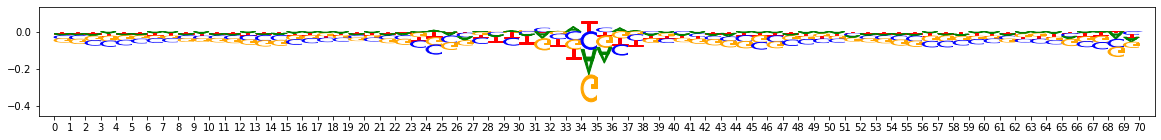

Task 0 actual importance scores:


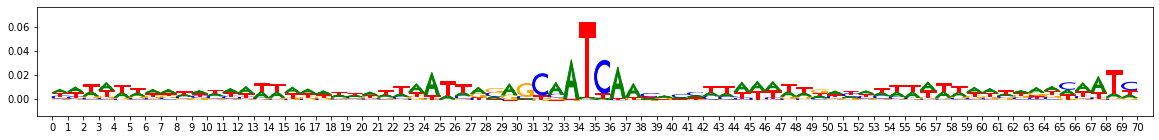

onehot, fwd and rev:


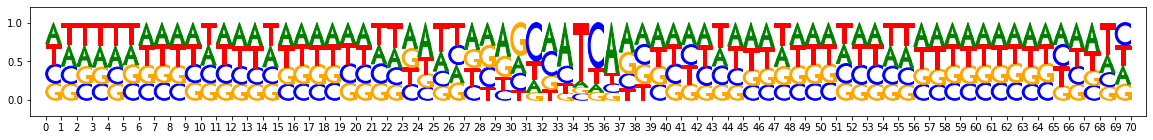

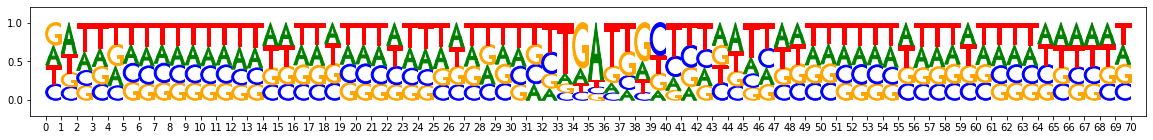

metacluster_0 pattern_1
total seqlets: 5128
Task 0 hypothetical scores:


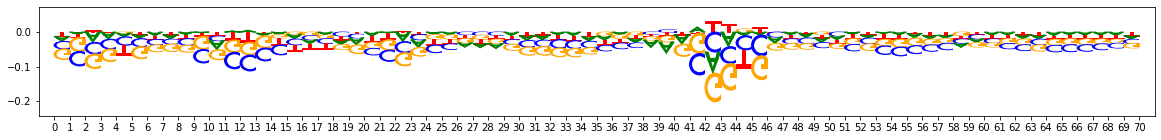

Task 0 actual importance scores:


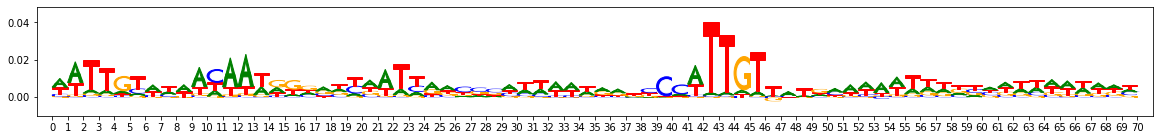

onehot, fwd and rev:


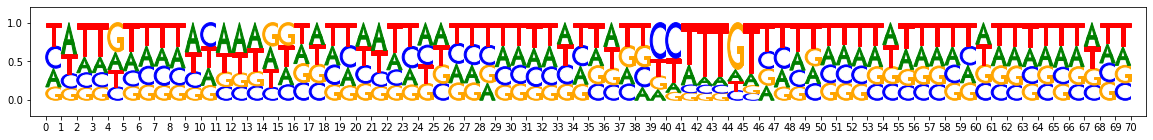

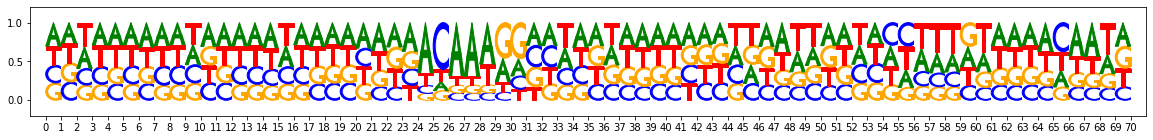

metacluster_0 pattern_2
total seqlets: 4822
Task 0 hypothetical scores:


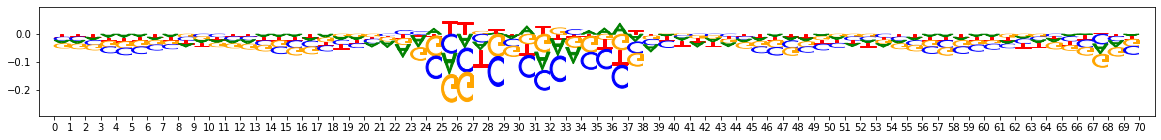

Task 0 actual importance scores:


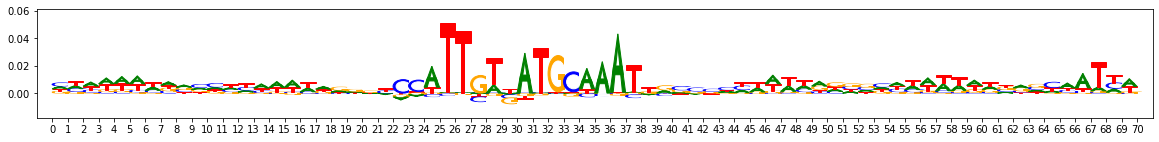

onehot, fwd and rev:


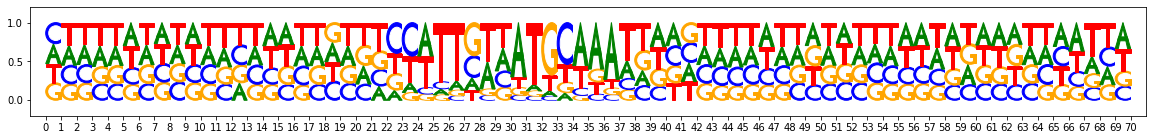

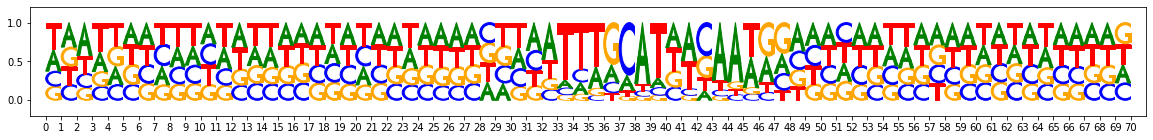

metacluster_0 pattern_3
total seqlets: 2269
Task 0 hypothetical scores:


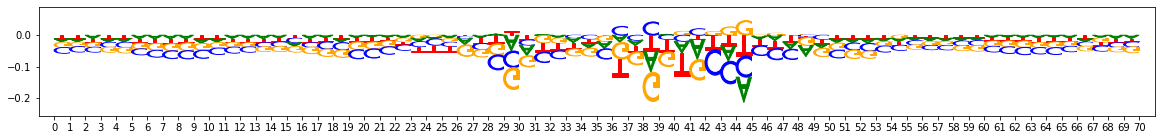

Task 0 actual importance scores:


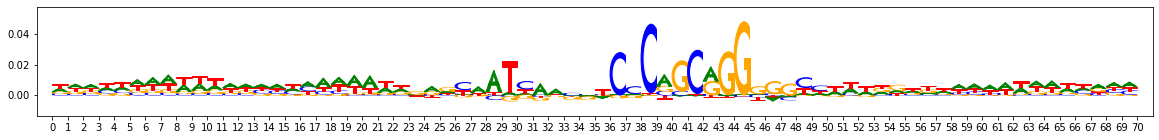

onehot, fwd and rev:


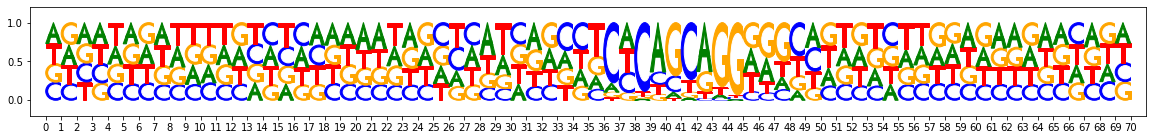

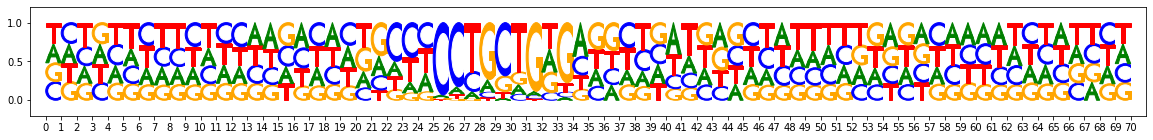

metacluster_0 pattern_4
total seqlets: 2098
Task 0 hypothetical scores:


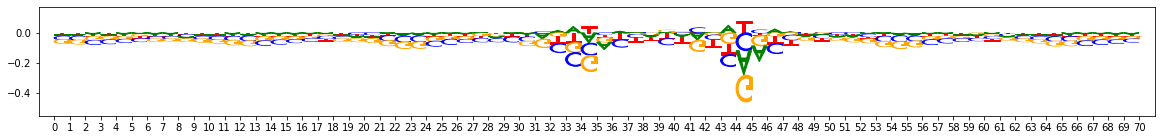

Task 0 actual importance scores:


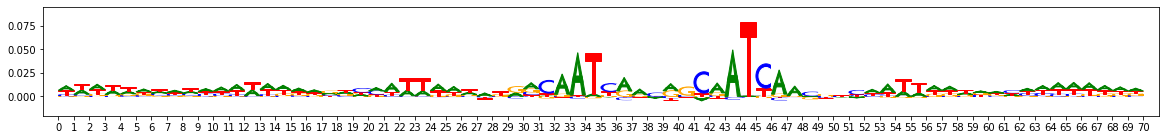

onehot, fwd and rev:


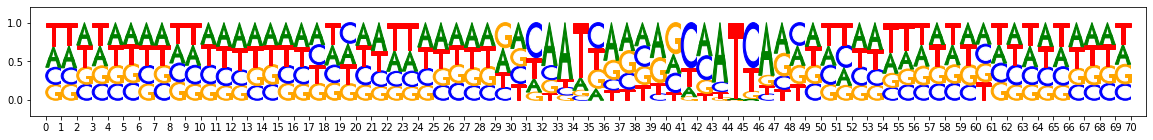

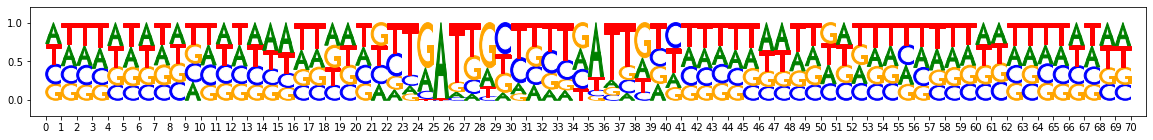

metacluster_0 pattern_5
total seqlets: 1766
Task 0 hypothetical scores:


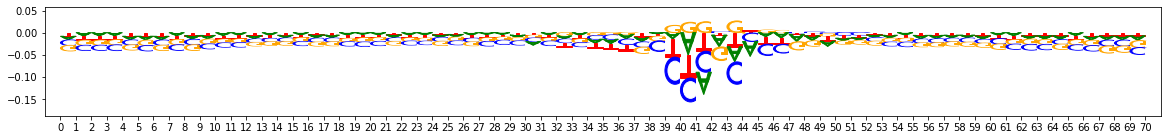

Task 0 actual importance scores:


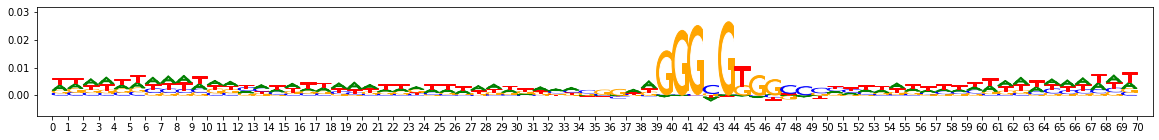

onehot, fwd and rev:


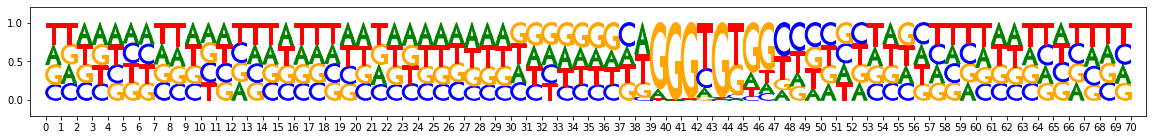

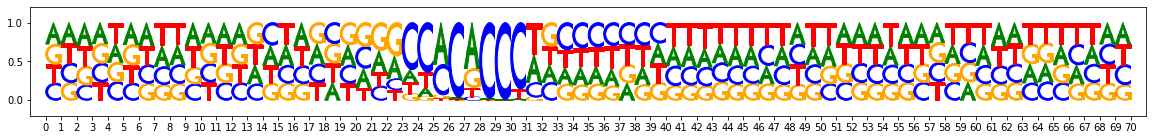

metacluster_0 pattern_6
total seqlets: 1337
Task 0 hypothetical scores:


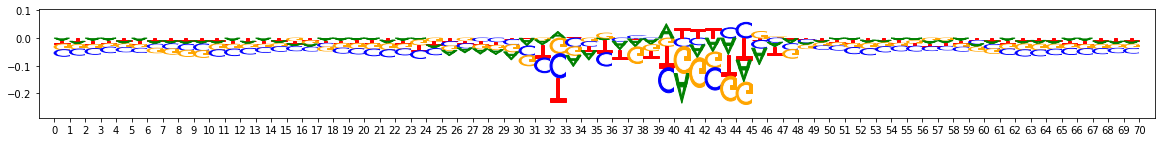

Task 0 actual importance scores:


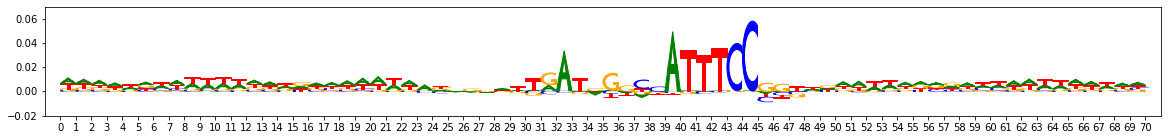

onehot, fwd and rev:


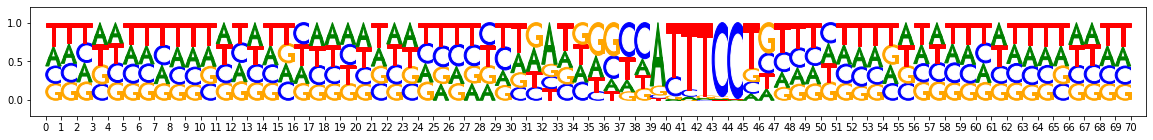

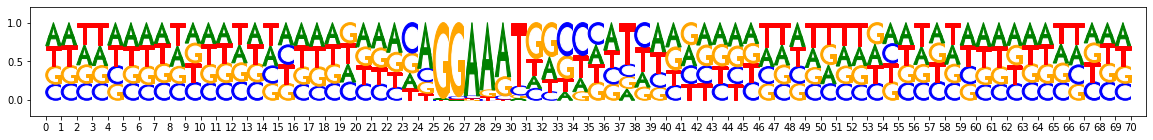

metacluster_0 pattern_7
total seqlets: 1229
Task 0 hypothetical scores:


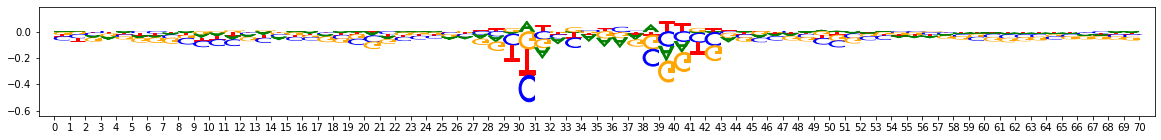

Task 0 actual importance scores:


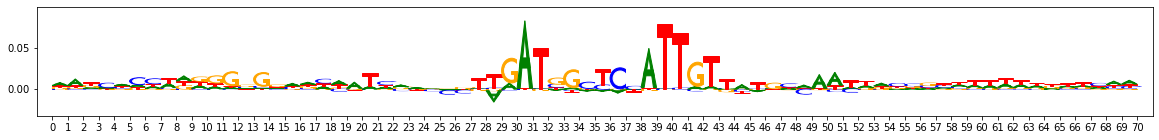

onehot, fwd and rev:


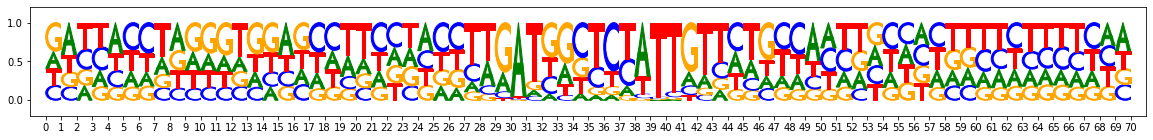

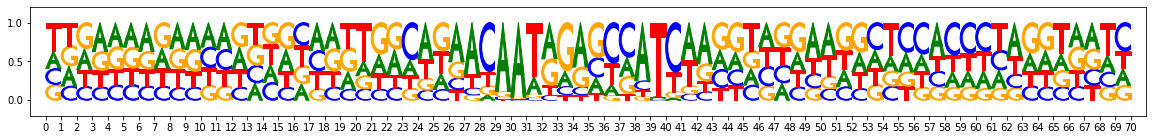

metacluster_0 pattern_8
total seqlets: 968
Task 0 hypothetical scores:


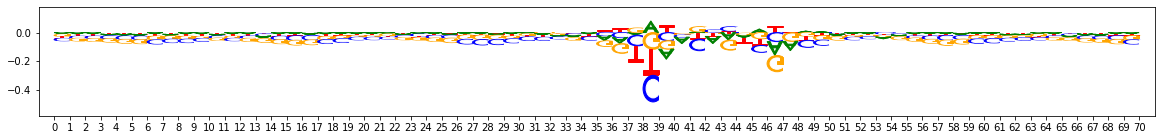

Task 0 actual importance scores:


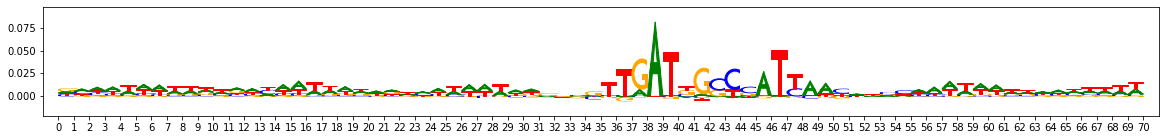

onehot, fwd and rev:


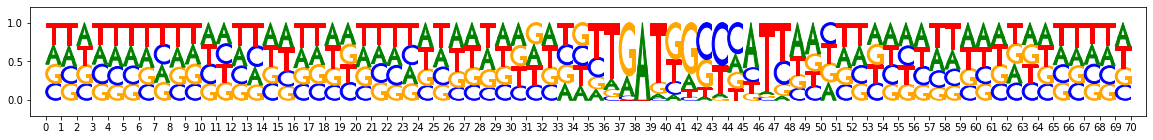

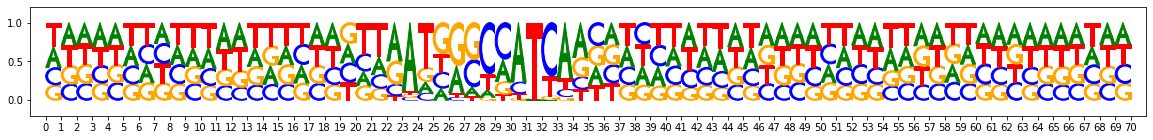

metacluster_0 pattern_9
total seqlets: 939
Task 0 hypothetical scores:


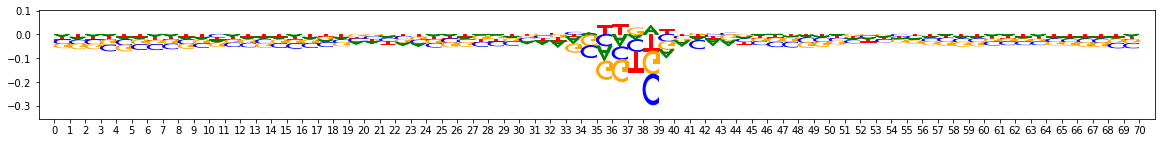

Task 0 actual importance scores:


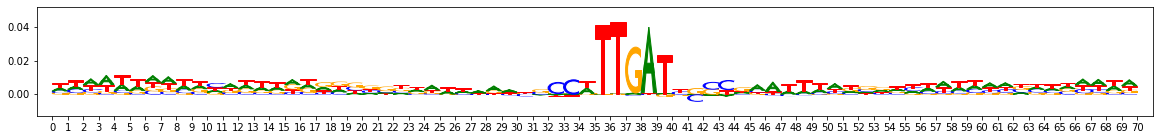

onehot, fwd and rev:


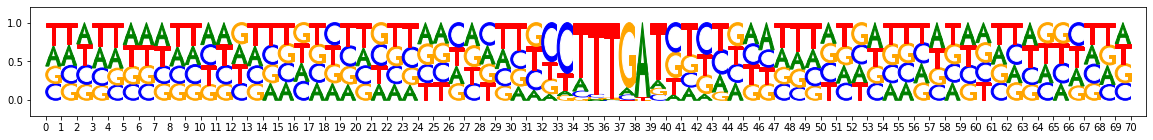

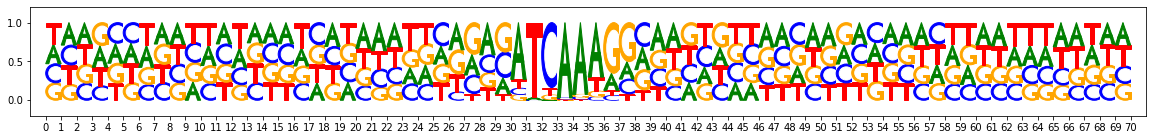

metacluster_0 pattern_10
total seqlets: 770
Task 0 hypothetical scores:


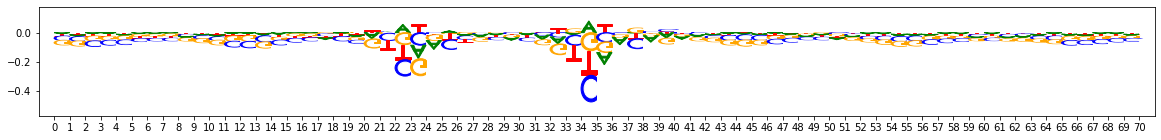

Task 0 actual importance scores:


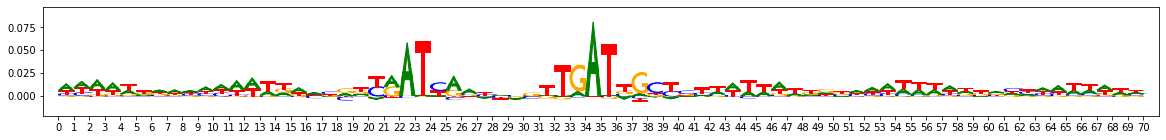

onehot, fwd and rev:


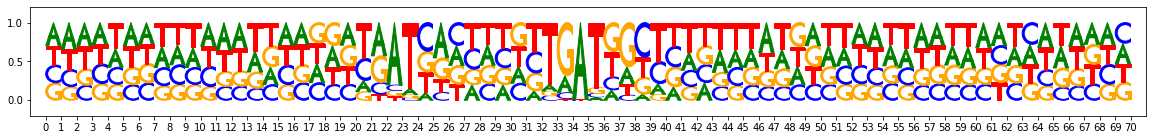

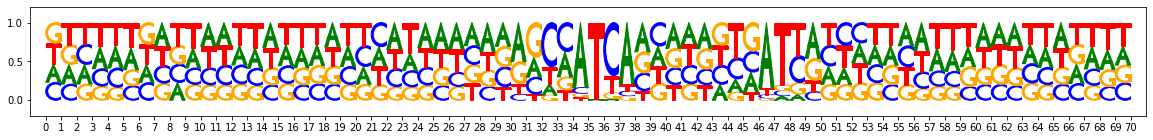

metacluster_0 pattern_11
total seqlets: 661
Task 0 hypothetical scores:


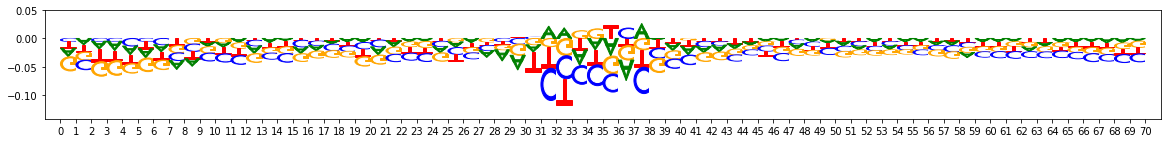

Task 0 actual importance scores:


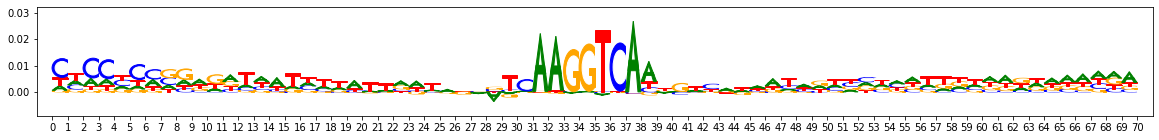

onehot, fwd and rev:


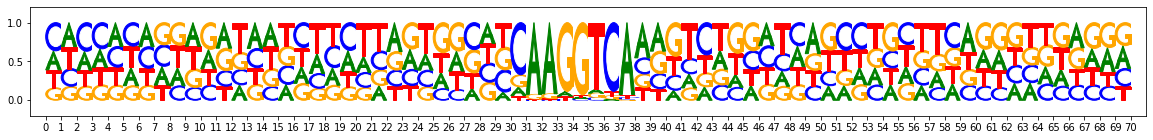

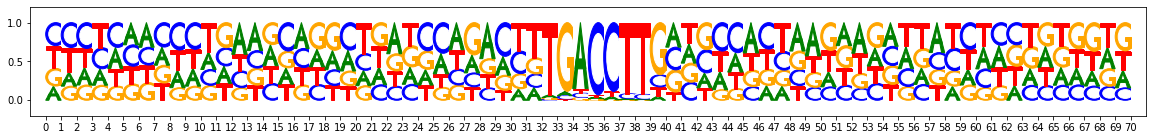

metacluster_0 pattern_12
total seqlets: 602
Task 0 hypothetical scores:


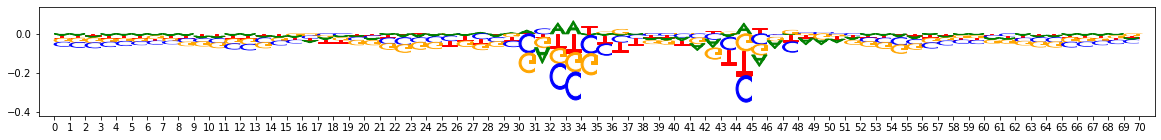

Task 0 actual importance scores:


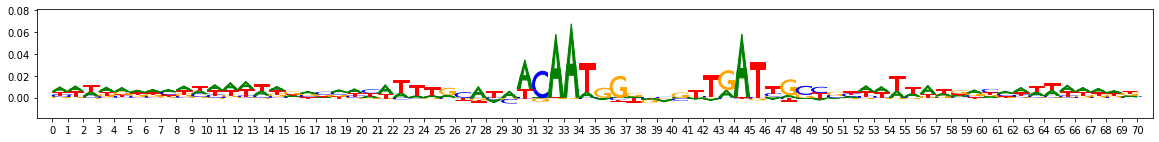

onehot, fwd and rev:


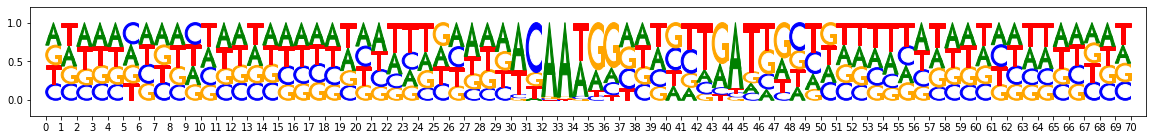

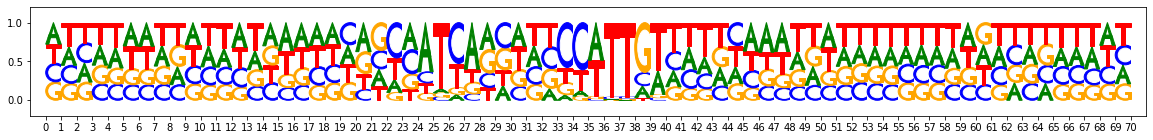

metacluster_0 pattern_13
total seqlets: 224
Task 0 hypothetical scores:


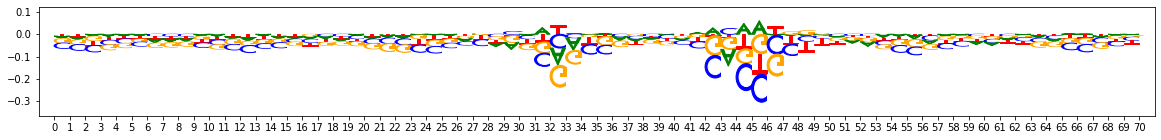

Task 0 actual importance scores:


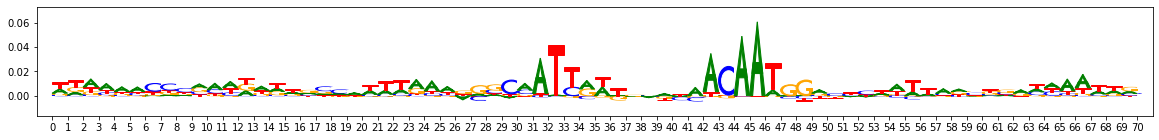

onehot, fwd and rev:


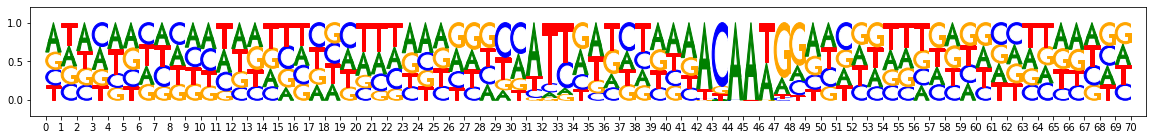

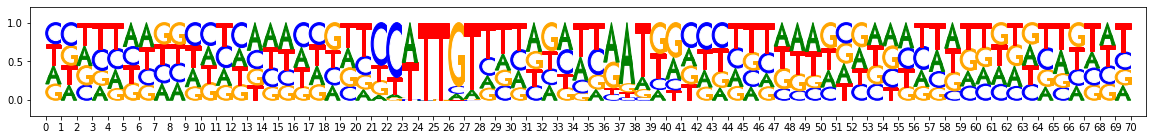

metacluster_0 pattern_14
total seqlets: 128
Task 0 hypothetical scores:


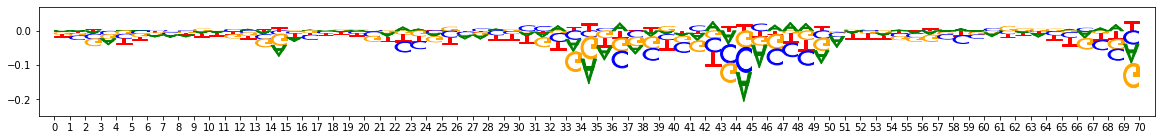

Task 0 actual importance scores:


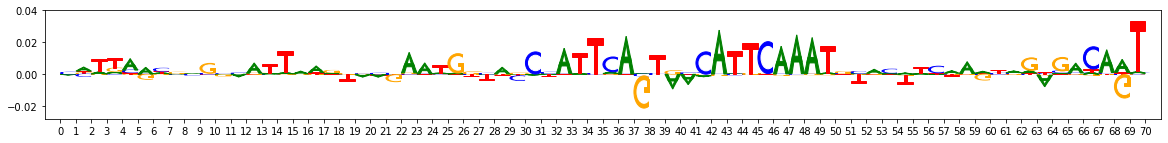

onehot, fwd and rev:


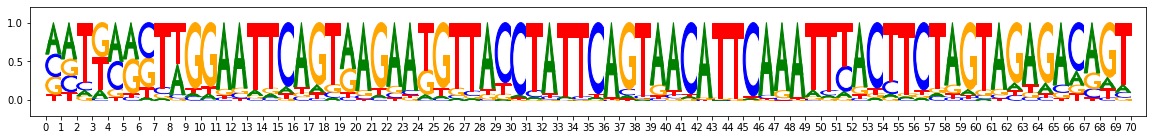

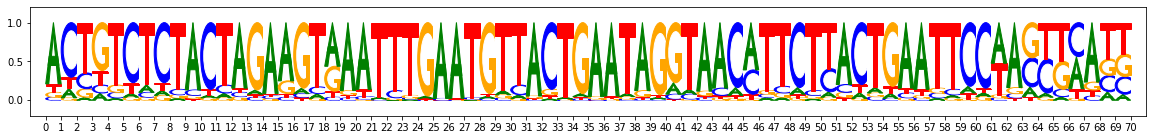

metacluster_0 pattern_15
total seqlets: 114
Task 0 hypothetical scores:


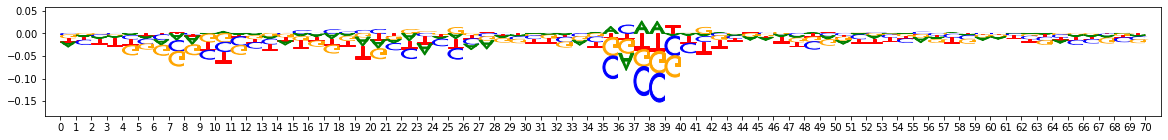

Task 0 actual importance scores:


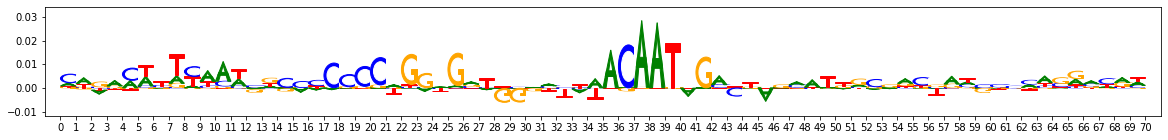

onehot, fwd and rev:


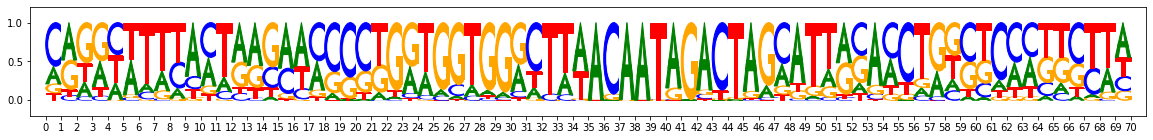

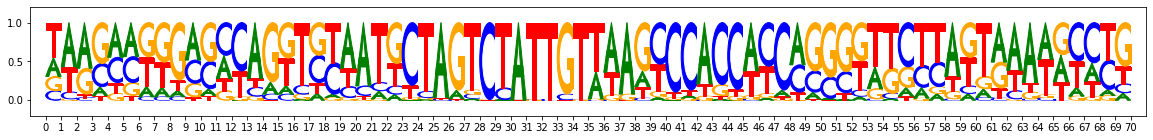

metacluster_1
activity pattern: [-1]


KeyError: "Unable to open object (object 'patterns' doesn't exist)"

In [18]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()